## Diamond Price Prediction

In [1]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Read the dataset
diamond=pd.read_csv('diamonds.csv')                        
diamond                                                    

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
#Modify the dataset
diamond=diamond.drop('Unnamed: 0',axis=1)
diamond.rename(columns = {"depth":"depth%","x":"length", "y":"width", "z":"depth"}, inplace = True)
diamond

,carat,cut,color,clarity,depth%,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
#Concise summary of the dataset
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth%   53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
#Entries whose datatype is object
print("Cut:     ",set(diamond["cut"]))
print("Color:   ",set(diamond["color"]))
print("Clarity: ",set(diamond["clarity"]))

Cut:      {'Premium', 'Ideal', 'Very Good', 'Good', 'Fair'}
Color:    {'E', 'J', 'F', 'I', 'G', 'H', 'D'}
Clarity:  {'VVS2', 'VS2', 'VS1', 'VVS1', 'SI1', 'IF', 'I1', 'SI2'}


In [6]:
#Check if there is null data in the dataset
diamond.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth%     False
table      False
price      False
length     False
width      False
depth      False
dtype: bool

In [7]:
#Descriptive statistics of the dataset
diamond.describe()

,carat,depth%,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
#Rows having value 0
diamond.loc[(diamond['length']==0)|(diamond['width']==0)|(diamond['depth']==0)]

,carat,cut,color,clarity,depth%,table,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
#Since having length or width or depth to be zero is illogical, replace 0 with mean in the dataset 
print(diamond['length'].mean())
print(diamond['width'].mean())
print(diamond['depth'].mean())
diamond['length']=diamond['length'].replace(0,diamond['length'].mean())
diamond['width']=diamond['width'].replace(0,diamond['width'].mean())
diamond['depth']=diamond['depth'].replace(0,diamond['depth'].mean())
diamond.describe()

5.731157211716609
5.734525954764462
3.5387337782723316


,carat,depth%,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540046
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


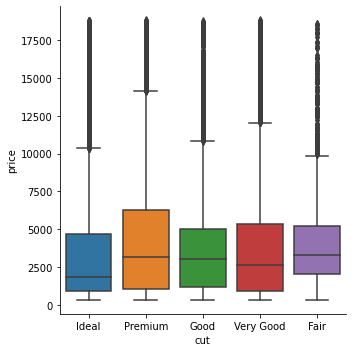

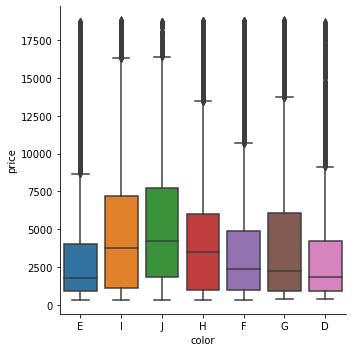

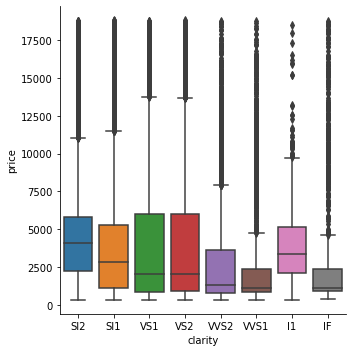

In [10]:
#Categorical features with respect to target (price) variable by using box plots.
input_cat_columns = diamond.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",kind="box",data=diamond)

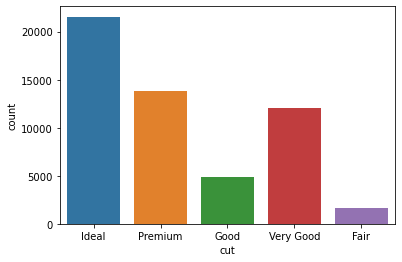

In [11]:
#Relationship between cut and count using count plot
sns.countplot(x='cut',data=diamond)

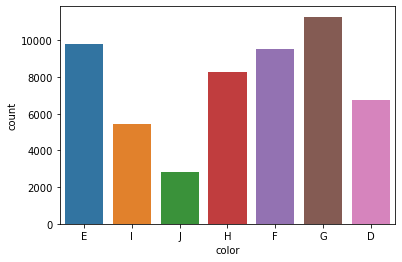

In [12]:
#Relationship between color and count using count plot
sns.countplot(x='color',data=diamond)

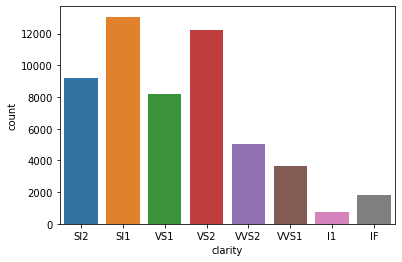

In [13]:
#Relationship betwwen clarity and count using count plot
sns.countplot(x='clarity',data=diamond)

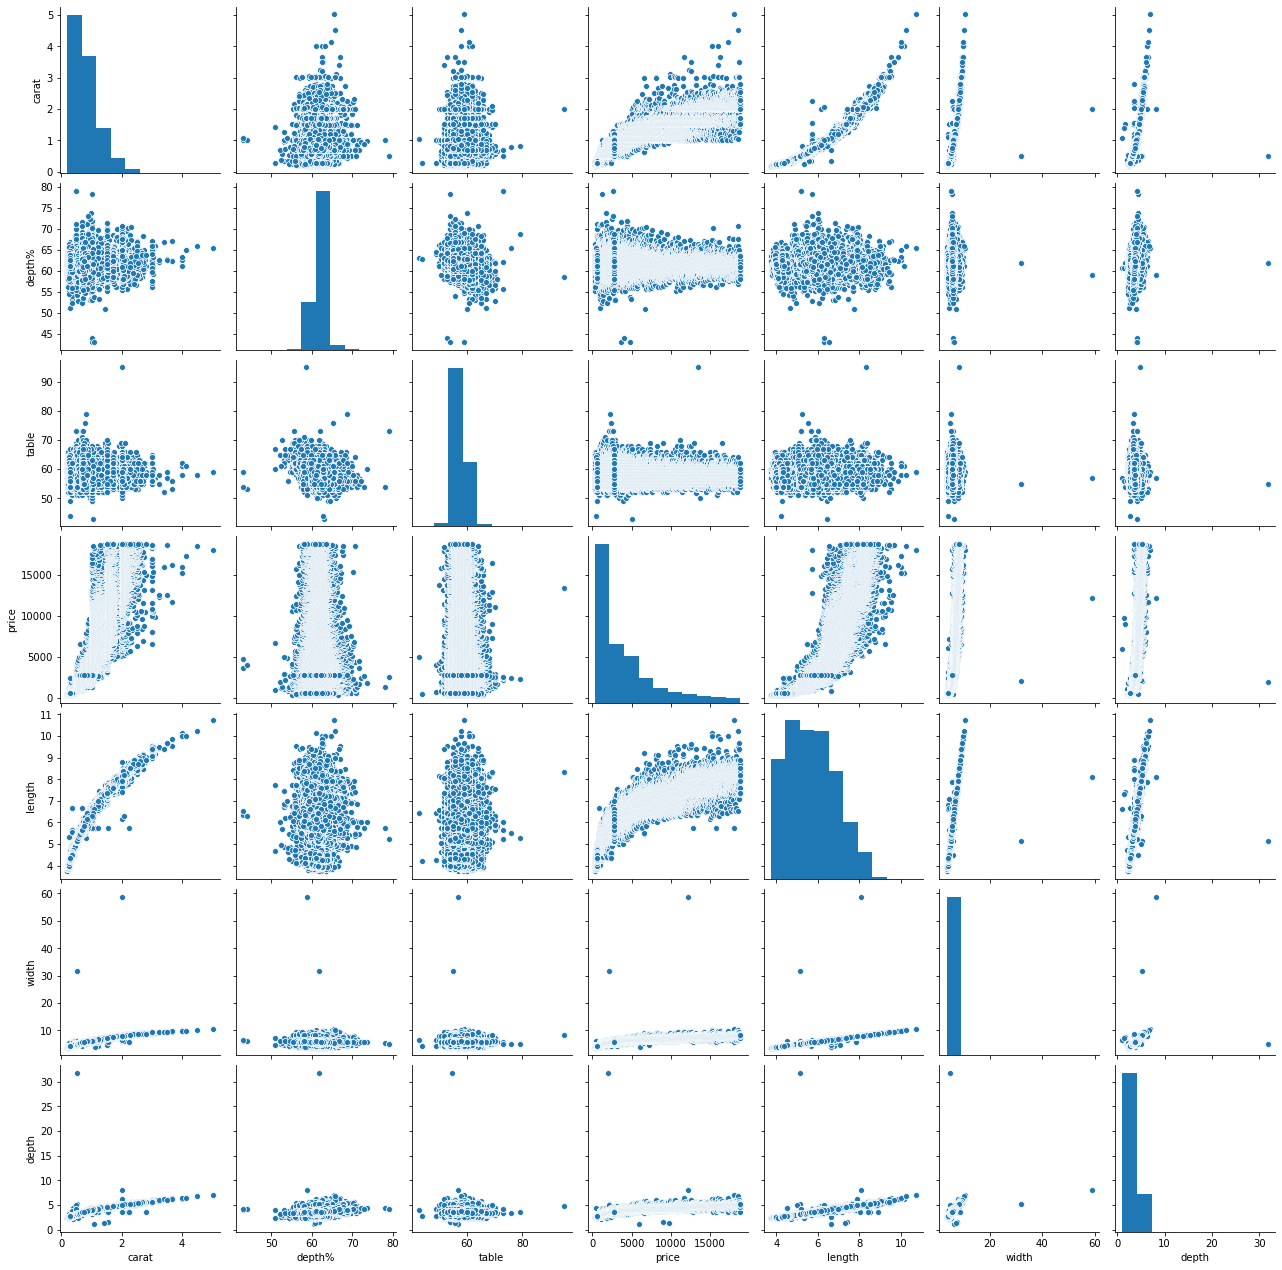

In [14]:
#Distribution of variables and the relationships between two variables using pair plot.
sns.pairplot(diamond)

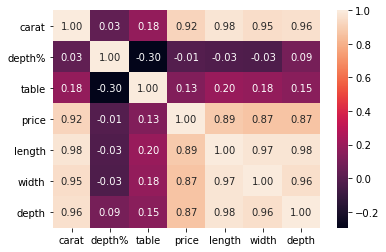

In [15]:
#Correlation of the dataset
sns.heatmap(diamond.corr(),annot=True,fmt='.2f')

In [16]:
#Conversion of categorical data to numerical data
diamond['cut']=diamond['cut'].map({'Premium':1,'Ideal':2,'Very Good':3,'Good':4,'Fair':5})
diamond['color']=diamond['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7})
diamond['clarity']=diamond['clarity'].map({'IF':1,'VVS1':2,'VVS2':3,'VS1':4,'VS2':5,'SI1':6,'SI2':7,'I1':8})
diamond.head()

,carat,cut,color,clarity,depth%,table,price,length,width,depth
0,0.23,2,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75


In [17]:
#Select features and target (price) for input
X=diamond.drop(['price'],axis=1)
Y=diamond['price']

In [18]:
#Split data into training set and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
#Predicting the price using Linear Regression
lnr_reg=LinearRegression()
lnr_reg.fit(X_train,Y_train)

y_pred=lnr_reg.predict(X_test)
print("Accuracy is "+ str(lnr_reg.score(X_test,Y_test)*100) +' %')

Accuracy is 90.96498663517797 %


In [20]:
#Predicting the price using DecisionTree Regression
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, Y_train)
y2_pred = dt_reg.predict(X_test)
print("Accuracy is "+ str(dt_reg.score(X_test,Y_test)*100) +' %')

Accuracy is 96.76314265643758 %


In [21]:
#Predicting the price using Polynomial Regression
poly_reg = PolynomialFeatures(degree = 2)
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)

reg_all = LinearRegression()
reg_all.fit(X_train,Y_train)
y_pred=reg_all.predict(X_test)

print("Accuracy is "+ str(reg_all.score(X_test,Y_test)*100) +' %')

Accuracy is 95.84432584149275 %


On comparing the above three algorithms, DecisionTree Regression proved to be the best 
algorithm for a diamond price prediction followed by Polynomial Regression of degree 2 
and Linear Regression.